In [36]:
# Libraries

library(keras)
library(mlbench)
library(dplyr)
library(magrittr)
library(neuralnet)

In [37]:
# Data

data('BostonHousing')

data <- BostonHousing

str(data)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : num  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ b      : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [38]:
# convert factor to numeric for neutral network

data %<>% mutate_if(is.factor, as.numeric)

str(data)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : num  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ b      : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [39]:
# Neural Network Visualization 

n <- neuralnet(medv ~ crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+lstat,
              data = data,
              hidden = c(10,5),
              linear.output = F,
              lifesign = 'full',
              rep = 1)

# plot not plotting here in kaggle

plot(n, col.hidden = 'darkgreen', col.hidden.synapse = "darkgreen",
   show.weights = F, information = F, fill = 'blue')

hidden: 10, 5    thresh: 0.01    rep: 1/1    steps: 
     28
	error: 138664.57624
	time: 0.02 secs



In [40]:
 # Matrix 

data <- as.matrix(data)

dimnames(data) <- NULL

In [41]:
# Partition

set.seed(1234)

ind <- sample(2, nrow(data), replace = T, prob = c(.7, .3))

training <- data[ind == 1, 1:13]

test <- data[ind == 2, 1:13]

trainingtarget <- data[ind == 1, 14]

testtarget <- data[ind ==2, 14]

In [42]:
# Normalize 

m <- colMeans(training)

s <- apply(training, 2, sd)

training <- scale(training, center = m, scale = s)

test <- scale(test, center = m, scale = s)

In [43]:
# Create Model

model <- keras_model_sequential()

model %>%
        layer_dense(units = 5, activation = "relu", input_shape = c(13)) %>%
        layer_dense(units = 1)


In [44]:
 # Compile 

model %>% compile(loss = 'mse',
                 optimizer = 'rmsprop',
                 metrics = 'mae')

In [46]:
# Fit model

mymodel <- model %>%
                fit(training, 
                   trainingtarget,
                   epochs  = 100,
                   batch_size = 32,
                   validation_split = 0.2)

In [48]:
# Evaluate

model %>% evaluate(test, testtarget)

pred <- model %>% predict(test)

mean((testtarget - pred)^2)

$loss
[1] 75.95172

$mae
[1] 5.50654

[1] 75.95172

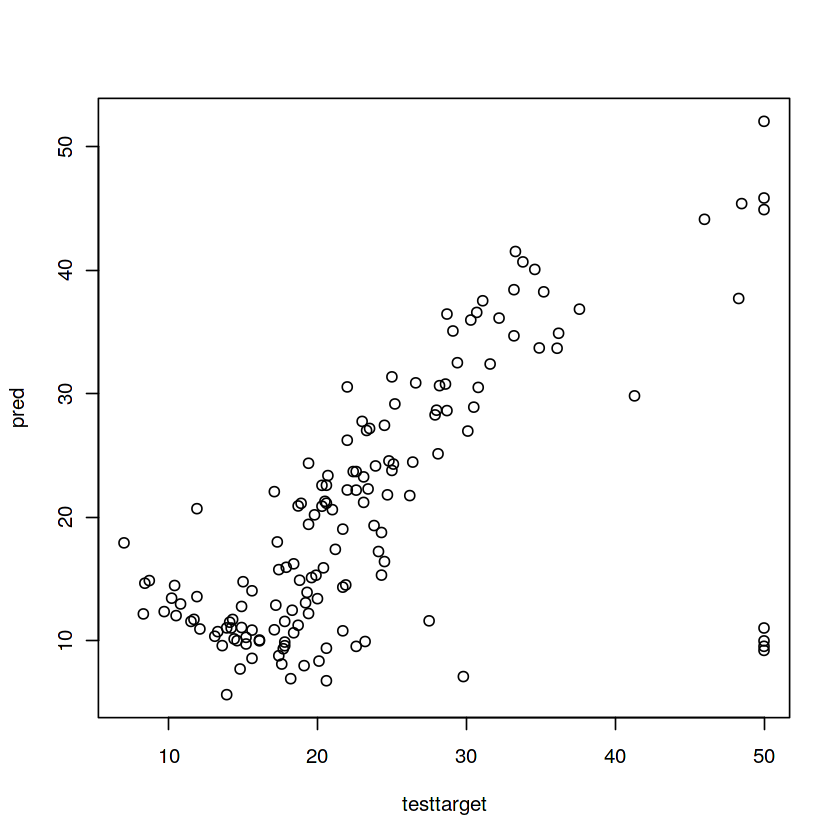

In [49]:
plot(testtarget, pred)

In [56]:
## Fine tune model

# Create Model

model <- keras_model_sequential()

model %>%
        layer_dense(units = 100, activation = "relu", input_shape = c(13)) %>%
        layer_dropout(rate = 0.4) %>%
        
        layer_dense(units = 50, activation = "relu") %>%
        layer_dropout(rate = 0.3) %>%

        layer_dense(units = 20, activation = "relu") %>%
        layer_dropout(rate = 0.2) %>%
        
        layer_dense(units = 1)

summary(model)


# Compile 

model %>% compile(loss = 'mse',
                 optimizer = optimizer_rmsprop(lr = 0.0001),
                 metrics = 'mae')


 # Compile 

model %>% compile(loss = 'mse',
                 optimizer = optimizer_rmsprop(lr = 0.001),
                 metrics = 'mae')


# Fit model

mymodel <- model %>%
                fit(training, 
                   trainingtarget,
                   epochs  = 100,
                   batch_size = 32,
                   validation_split = 0.2)


# Evaluate

model %>% evaluate(test, testtarget)

pred <- model %>% predict(test)

mean((testtarget - pred)^2)

Model: "sequential_8"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_26 (Dense)                    (None, 100)                     1400        
________________________________________________________________________________
dropout_12 (Dropout)                (None, 100)                     0           
________________________________________________________________________________
dense_27 (Dense)                    (None, 50)                      5050        
________________________________________________________________________________
dropout_13 (Dropout)                (None, 50)                      0           
________________________________________________________________________________
dense_28 (Dense)                    (None, 20)                      1020        
________________________________________________________________________________
dropou

$loss
[1] 26.91242

$mae
[1] 3.154955

[1] 26.91242